In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Анализ и подготовка данных

## Загрузка и анализ данных

In [3]:
df = pd.read_csv('train.csv', index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [96]:
nn_features = df.isna().sum().sort_values(ascending=False)
nn_features = nn_features[nn_features > 0]
nn_features

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

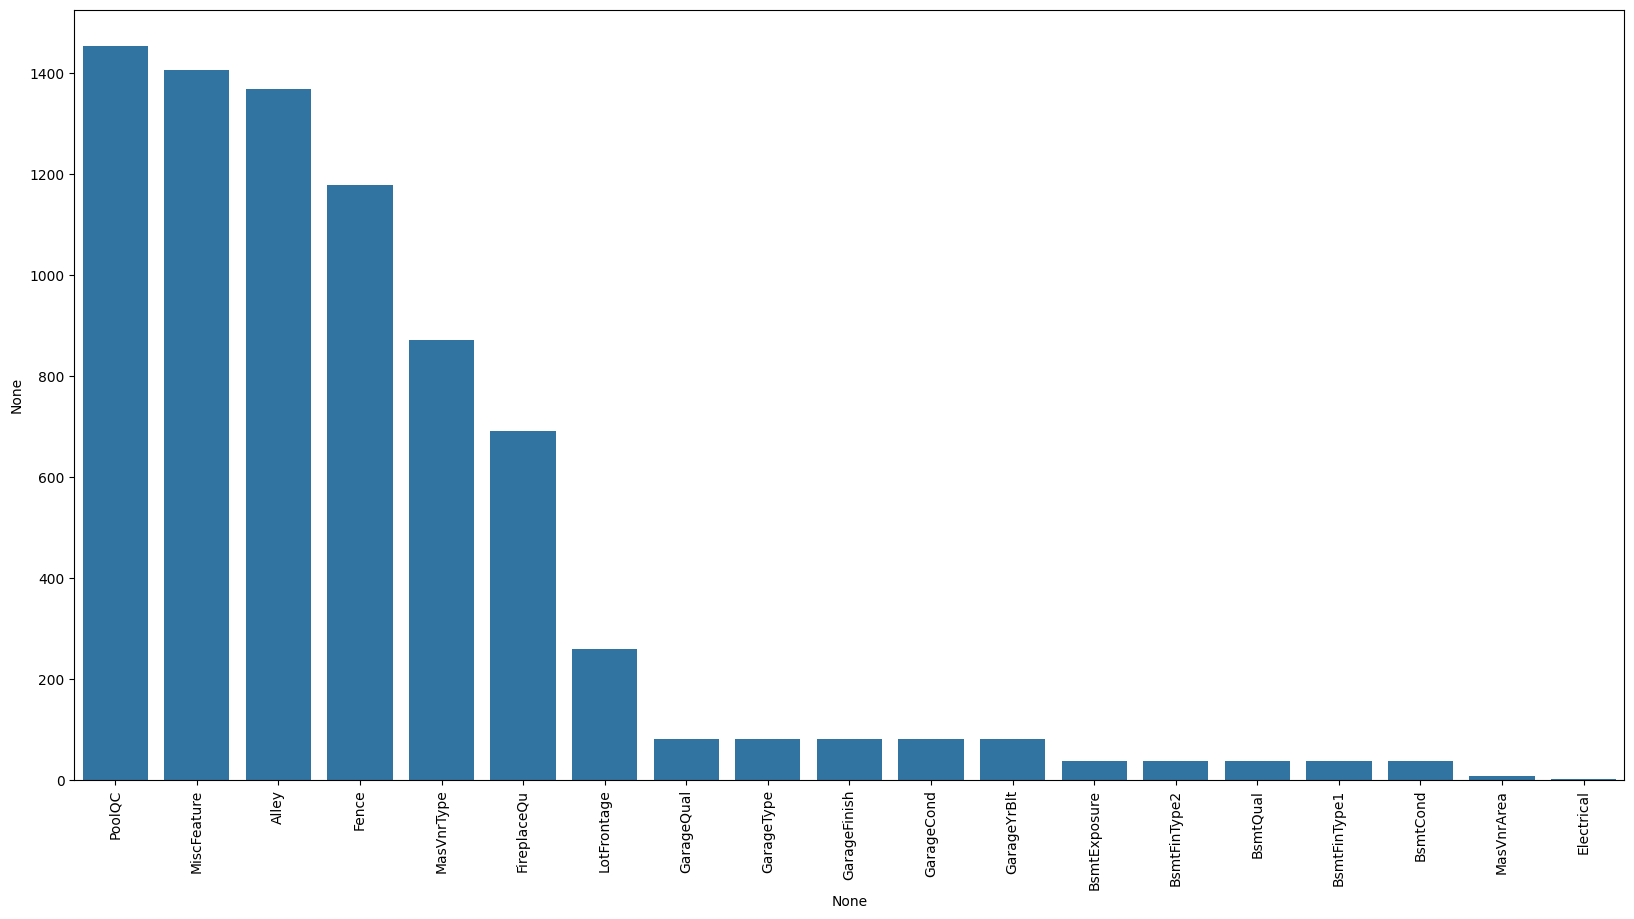

In [97]:
plt.figure(figsize=[20, 10])
sns.barplot(x=nn_features.index, y=nn_features)

plt.xticks(rotation=90);

In [98]:
nn_features_percents = (df.isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
nn_features_percents = nn_features_percents[nn_features_percents > 0]
nn_features_percents

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

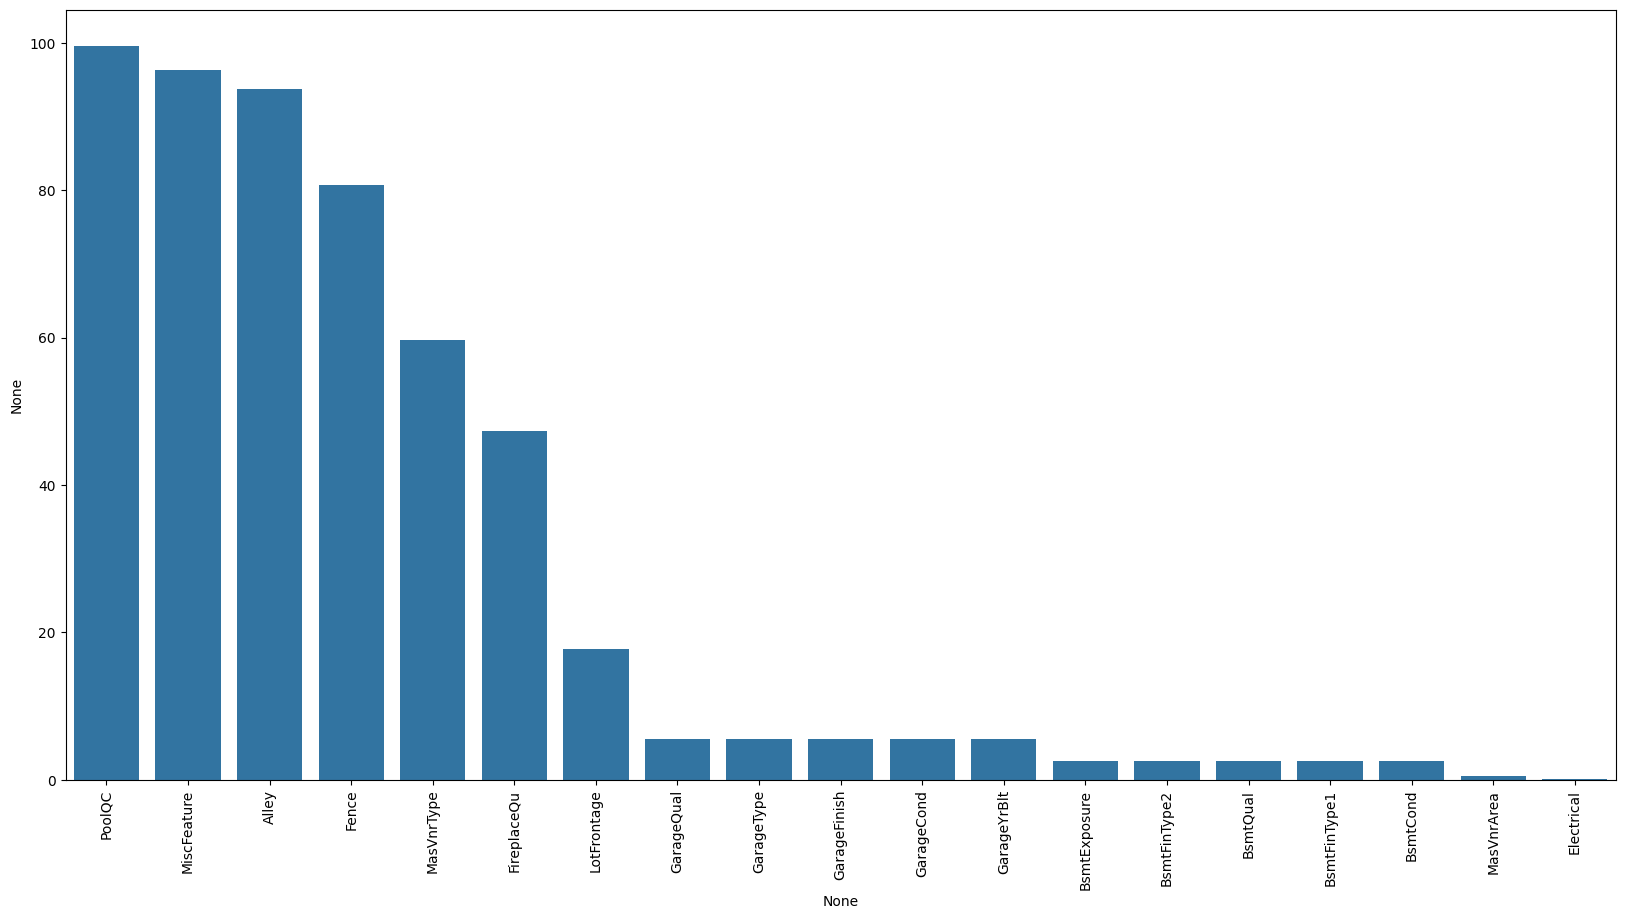

In [99]:
plt.figure(figsize=[20, 10])
sns.barplot(x=nn_features_percents.index, y=nn_features_percents)

plt.xticks(rotation=90);

In [101]:
df[nn_features.index].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   MasVnrType    588 non-null    object 
 5   FireplaceQu   770 non-null    object 
 6   LotFrontage   1201 non-null   float64
 7   GarageQual    1379 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageFinish  1379 non-null   object 
 10  GarageCond    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType2  1422 non-null   object 
 14  BsmtQual      1423 non-null   object 
 15  BsmtFinType1  1423 non-null   object 
 16  BsmtCond      1423 non-null   object 
 17  MasVnrArea    1452 non-null   float64
 18  Electrical    1459 non-null   obj

In [ ]:
# Посмотреть не пустые строки
df[]